# 📊 Kapitel 4: Datenanalyse & Korrelationen

## 4.1 Zielsetzung und Methodik
Ziel dieses Kapitels ist es, den Zusammenhang zwischen Zinsen, Inflation und Immobilienpreisentwicklung in der Schweiz zu analysieren.
Es kommen Korrelationsanalysen, Scatterplots und Heatmaps zum Einsatz. Die Grundlage bilden bereinigte Datensätze:
- `zins_cleaned.csv`
- `inflation_cleaned.csv`
- `wohnen_cleaned.csv`
- `kauf_cleaned.csv`

Da es sich bei den verwendeten Zinssätzen, Inflationsraten und Immobilienpreisindizes um aggregierte makroökonomische Zeitreihendaten handelt, stehen pro Jahr nur wenige Vergleichspunkte zur Verfügung. Diese geringe Anzahl an Beobachtungen ist eine strukturelle Eigenschaft der offiziellen Quellen und kein methodisches Defizit der Analyse. Der Fokus liegt daher auf einer konsistenten quartalsweisen Betrachtung der Trends und Zusammenhänge im Zeitraum 2019 bis 2022.

Der Datensatz "kauf_cleaned.csv" basiert auf der quartalsweisen Aggregation von validierten Inseraten aus "kauf_cleaned_roh.csv" und enthält Durchschnittswerte der Preisvariable "price_calculated" pro Quartal.

In [16]:
# 📚 Importieren der benötigten Bibliothek
# Wir benötigen pandas, um CSV-Dateien einzulesen und zu verarbeiten
import pandas as pd

In [17]:
# 📂 Einlesen der vorbereiteten, zusammengeführten CSV-Datei
# Wir lesen die Datei "merged_cleaned.csv" ein und setzen die erste Spalte (Datumswerte) als Index
df_merged = pd.read_csv("../data/merged_cleaned.csv", index_col=0, parse_dates=True)

In [18]:
# ✅ Kurze Kontrolle: Form des eingelesenen DataFrames
# Damit stellen wir sicher, dass die Datei korrekt geladen wurde
print(df_merged.shape)
df_merged.head()

(12, 28)


,Zins_Fest_MW,festhypo_5_7_median,festhypo_5_7_anzahl_abschluesse,Zins_Var_MW,variabelhypo_5_7_median,variabelhypo_5_7_anzahl_abschluesse,LIK,HVPI,totalindex_und_subindizes,wohneigentum_total,...,einfamilienhaeuser_gemeindetyp 3,einfamilienhaeuser_gemeindetyp 4,einfamilienhaeuser_gemeindetyp 5,eigentumswohnungen_egw,eigentumswohnungen_gemeindetyp 1,eigentumswohnungen_gemeindetyp 2,eigentumswohnungen_gemeindetyp 3,eigentumswohnungen_gemeindetyp 4,eigentumswohnungen_gemeindetyp 5,price_calculated
2019-01-01,1.2196,1.10,404,0.92384,0.90,99,0.4,0.4,2019Q1,97.6275,...,96.2836,98.8768,97.1565,98.1662,95.8170,98.8719,98.7477,100.5461,98.7016,825309.097848
2019-01-01,1.1661,1.10,310,0.92389,0.90,64,0.4,0.4,2019Q1,97.6275,...,96.2836,98.8768,97.1565,98.1662,95.8170,98.8719,98.7477,100.5461,98.7016,825309.097848
2019-01-01,1.1481,1.10,390,0.92855,0.90,62,0.4,0.4,2019Q1,97.6275,...,96.2836,98.8768,97.1565,98.1662,95.8170,98.8719,98.7477,100.5461,98.7016,825309.097848
2020-01-01,1.0769,1.04,369,0.86446,0.85,92,-0.7,-0.8,2020Q1,99.2443,...,98.7522,98.9907,99.1911,99.0520,97.5903,99.3591,98.0392,101.2635,99.1739,795583.306735
2020-01-01,1.0740,1.00,236,0.84412,0.85,34,-0.7,-0.8,2020Q1,99.2443,...,98.7522,98.9907,99.1911,99.0520,97.5903,99.3591,98.0392,101.2635,99.1739,795583.306735


## 4.2 Datenzusammenführung
Die Datensätze werden anhand ihres Zeitindexes miteinander kombiniert.

In [19]:
# 🕵️‍♂️ Kontrolle des Zeitbereichs
# Wir prüfen, von wann bis wann die Daten im DataFrame "df_merged" vorliegen
# (wichtig, um spätere Analysen korrekt auf einen gemeinsamen Zeitraum abzustimmen)

print("Zeitraum des DataFrames:")
print(f"Startdatum: {df_merged.index.min().date()}")
print(f"Enddatum: {df_merged.index.max().date()}")

Zeitraum des DataFrames:
Startdatum: 2019-01-01
Enddatum: 2022-01-01


In [20]:
# 📅 Zeitindex auf Quartalsbeginn normieren
# Wir wandeln den Zeitindex von "df_merged" in Quartale um
# (dabei setzen wir jedes Datum auf den Beginn des jeweiligen Quartals)

df_merged.index = df_merged.index.to_period("Q").to_timestamp()

# Kontrolle: Neue Indexstruktur anzeigen
print("Neuer Zeitindex nach Normierung auf Quartalsbeginn:")
print(df_merged.index)


Neuer Zeitindex nach Normierung auf Quartalsbeginn:
DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2022-01-01', '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', freq=None)


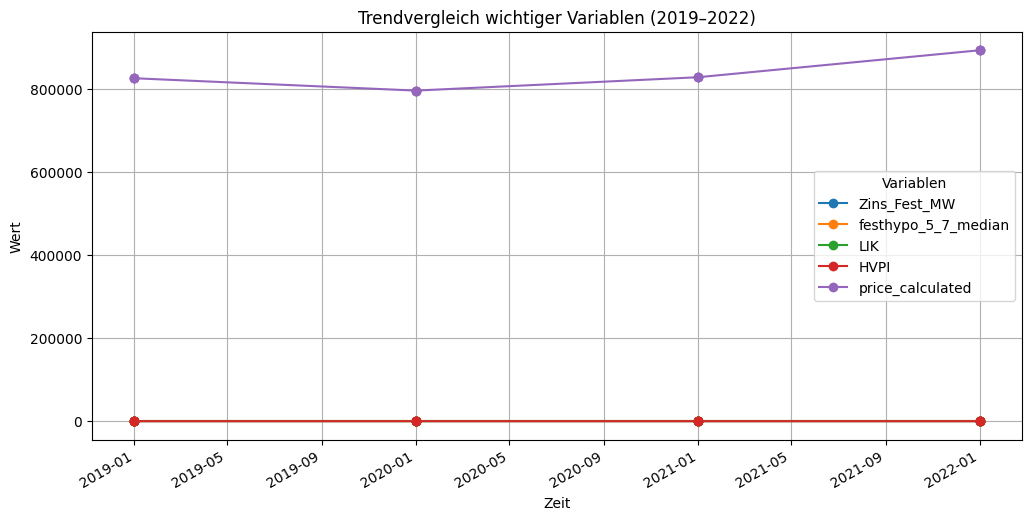

In [21]:
# 📈 Erste deskriptive Analyse: Trendvergleich
# Wir erstellen einfache Linienplots, um den zeitlichen Verlauf ausgewählter Variablen zu analysieren

import matplotlib.pyplot as plt

# Wichtige Variablen auswählen
variablen = [
    "Zins_Fest_MW", 
    "festhypo_5_7_median", 
    "LIK", 
    "HVPI", 
    "price_calculated"
]

# Plot erstellen
df_merged[variablen].plot(figsize=(12, 6), marker='o')
plt.title("Trendvergleich wichtiger Variablen (2019–2022)")
plt.xlabel("Zeit")
plt.ylabel("Wert")
plt.grid(True)
plt.legend(title="Variablen")
plt.show()


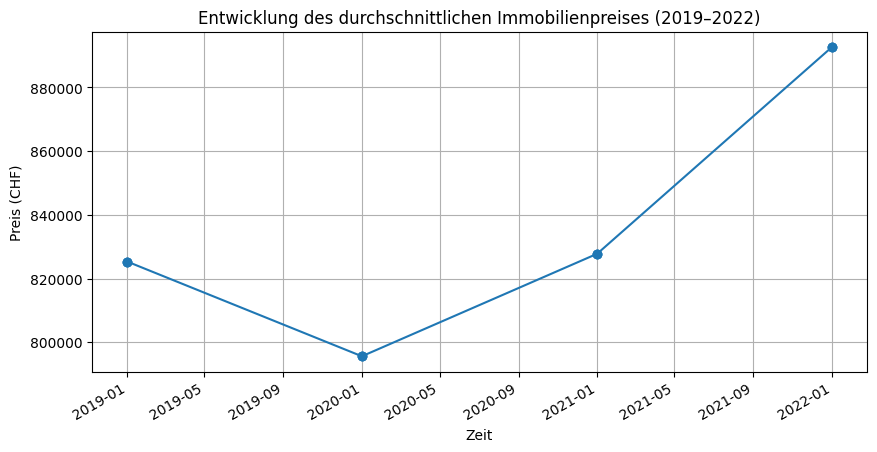

In [22]:
# 📊 Separate Trendvergleiche erstellen, damit kleinere Variablen sichtbar werden

# Plot für Preisentwicklung
plt.figure(figsize=(10, 5))
df_merged["price_calculated"].plot(marker='o')
plt.title("Entwicklung des durchschnittlichen Immobilienpreises (2019–2022)")
plt.xlabel("Zeit")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

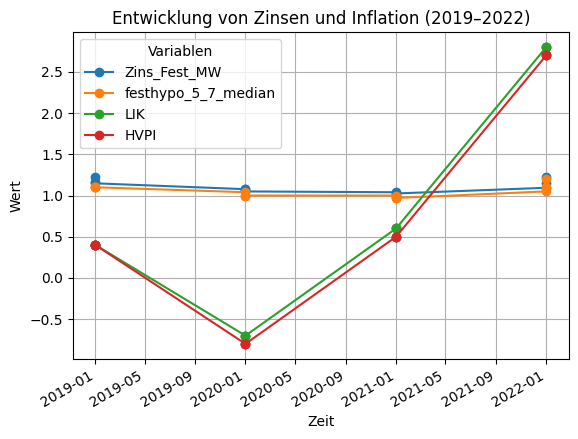

In [23]:
# Plot für Zinsen und Inflation
plt.figure(figsize=(10, 5))
df_merged[["Zins_Fest_MW", "festhypo_5_7_median", "LIK", "HVPI"]].plot(marker='o')
plt.title("Entwicklung von Zinsen und Inflation (2019–2022)")
plt.xlabel("Zeit")
plt.ylabel("Wert")
plt.grid(True)
plt.legend(title="Variablen")
plt.show()

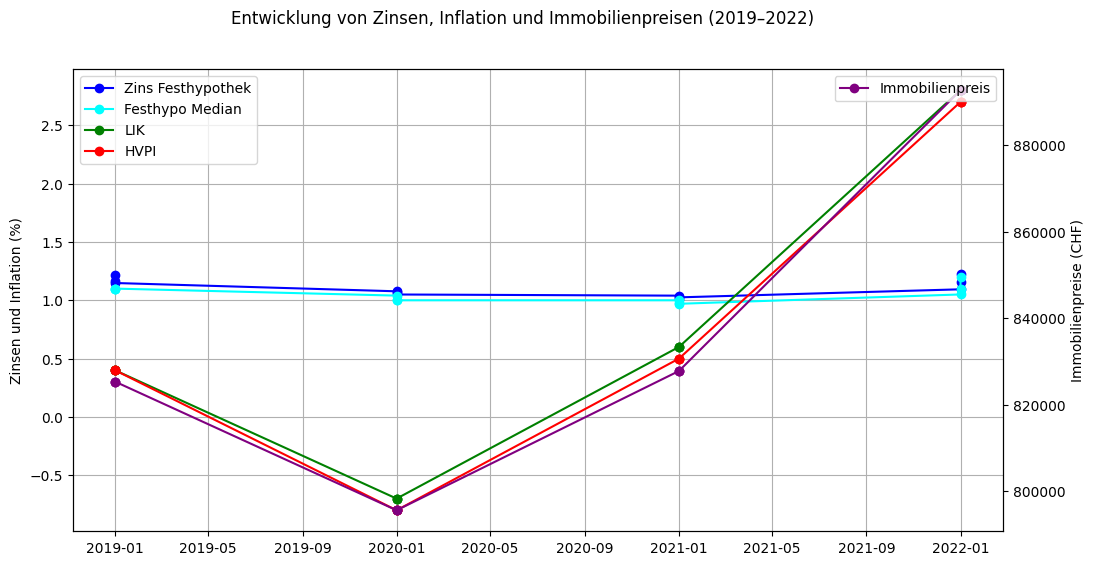

In [24]:
import matplotlib.pyplot as plt

# 📊 Darstellung mit Sekundärachse
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primärachse: Zinsen und Inflation
ax1.plot(df_merged.index, df_merged["Zins_Fest_MW"], label="Zins Festhypothek", color="blue", marker="o")
ax1.plot(df_merged.index, df_merged["festhypo_5_7_median"], label="Festhypo Median", color="cyan", marker="o")
ax1.plot(df_merged.index, df_merged["LIK"], label="LIK", color="green", marker="o")
ax1.plot(df_merged.index, df_merged["HVPI"], label="HVPI", color="red", marker="o")
ax1.set_ylabel("Zinsen und Inflation (%)")
ax1.grid(True)

# Sekundärachse: Immobilienpreise
ax2 = ax1.twinx()
ax2.plot(df_merged.index, df_merged["price_calculated"], label="Immobilienpreis", color="purple", marker="o")
ax2.set_ylabel("Immobilienpreise (CHF)")

# Titel und Legenden
fig.suptitle("Entwicklung von Zinsen, Inflation und Immobilienpreisen (2019–2022)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


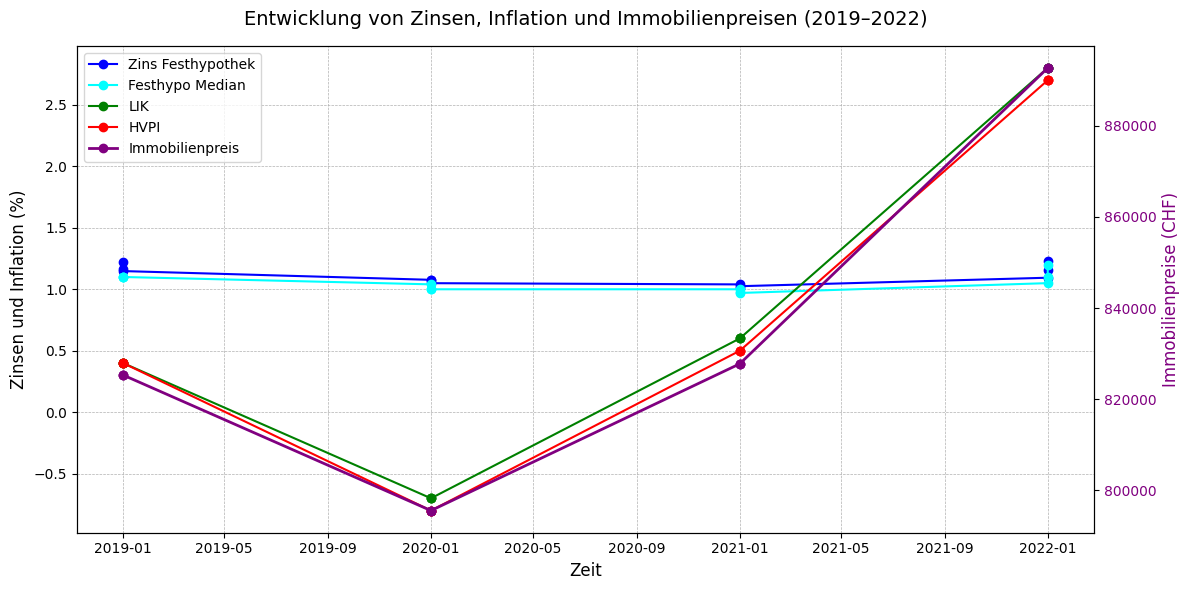

In [25]:
import matplotlib.pyplot as plt

# 🎯 Übersichtlicher Vergleich von Zinsen, Inflation und Immobilienpreisen (2019–2022)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(12, 6))

# ➡️ Linke Achse: Zinsen und Inflation
ax1.plot(df_merged.index, df_merged["Zins_Fest_MW"], marker='o', label="Zins Festhypothek", color='blue')
ax1.plot(df_merged.index, df_merged["festhypo_5_7_median"], marker='o', label="Festhypo Median", color='cyan')
ax1.plot(df_merged.index, df_merged["LIK"], marker='o', label="LIK", color='green')
ax1.plot(df_merged.index, df_merged["HVPI"], marker='o', label="HVPI", color='red')

ax1.set_xlabel("Zeit", fontsize=12)
ax1.set_ylabel("Zinsen und Inflation (%)", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# ➡️ Rechte Achse: Immobilienpreis
ax2 = ax1.twinx()
ax2.plot(df_merged.index, df_merged["price_calculated"], marker='o', label="Immobilienpreis", color='purple', linewidth=2)
ax2.set_ylabel("Immobilienpreise (CHF)", fontsize=12, color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# 🎨 Legenden kombinieren
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

# 📈 Titel setzen
plt.title("Entwicklung von Zinsen, Inflation und Immobilienpreisen (2019–2022)", fontsize=14, pad=15)

# 📏 Layout optimieren
plt.tight_layout()

# 🚀 Grafik anzeigen
plt.show()


## 4.3 Deskriptive Analyse
In einem ersten Schritt werden die zeitlichen Verläufe der Variablen visuell analysiert (Trendvergleich), gefolgt von Verteilungen (Boxplots).

<Figure size 1000x600 with 0 Axes>

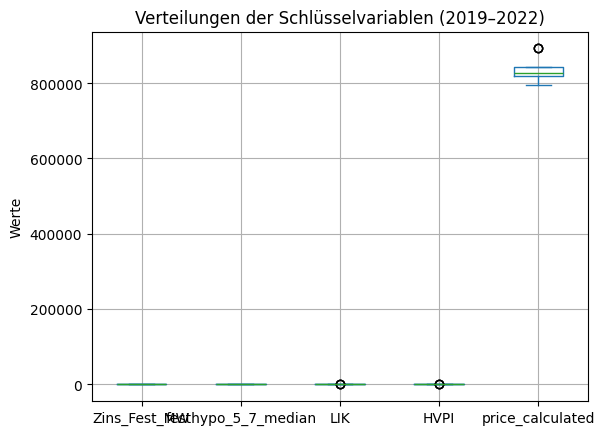

In [26]:
# 📊 Boxplots zur Verteilung der Variablen erstellen
# Wir analysieren die Streuung und Ausreisser von Schlüsselvariablen mithilfe von Boxplots

import matplotlib.pyplot as plt

# Auswahl wichtiger Variablen
variablen = ["Zins_Fest_MW", "festhypo_5_7_median", "LIK", "HVPI", "price_calculated"]

# Plot erstellen
plt.figure(figsize=(10, 6))
df_merged[variablen].plot(kind='box')
plt.title("Verteilungen der Schlüsselvariablen (2019–2022)")
plt.ylabel("Werte")
plt.grid(True)
plt.show()


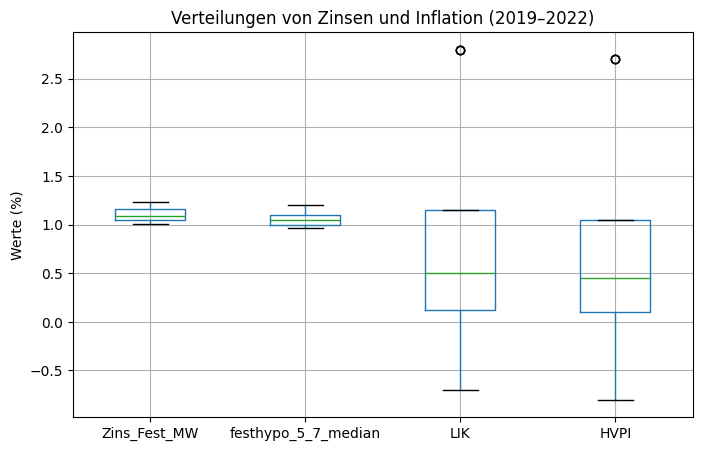

In [27]:
# 📦 Boxplot der Zinsen und Inflation erstellen
# Wir analysieren nur Variablen mit ähnlicher Grössenordnung (ca. -1% bis 3%)

import matplotlib.pyplot as plt

# Auswahl der relevanten Variablen
boxplot_variablen = ["Zins_Fest_MW", "festhypo_5_7_median", "LIK", "HVPI"]

# 📊 Boxplot zeichnen
plt.figure(figsize=(8, 5))
df_merged[boxplot_variablen].boxplot()
plt.title("Verteilungen von Zinsen und Inflation (2019–2022)")
plt.ylabel("Werte (%)")
plt.grid(True)
plt.show()


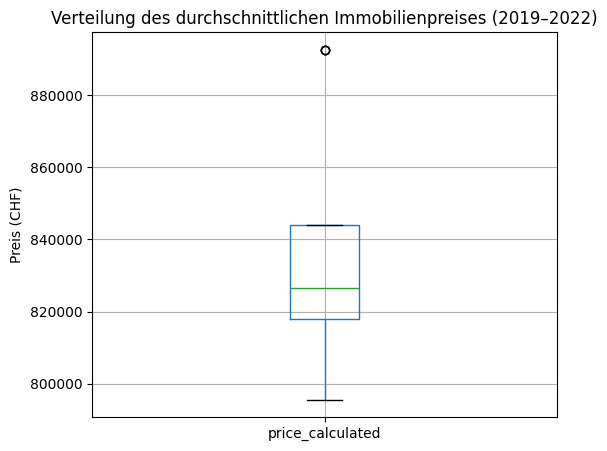

In [28]:
# 📦 Separater Boxplot für Immobilienpreise
# Wir plotten "price_calculated" einzeln, da die Werte eine ganz andere Grössenordnung haben

plt.figure(figsize=(6, 5))
df_merged[["price_calculated"]].boxplot()
plt.title("Verteilung des durchschnittlichen Immobilienpreises (2019–2022)")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()


Interpretation:
Beim durchschnittlichen Immobilienpreis zeigt der Boxplot einen einzelnen Ausreisser nach oben, was auf ein ungewöhnlich hohes Preisniveau in einem einzelnen Quartal hinweist. Der obere Whisker fehlt, da matplotlib Werte oberhalb von 1,5-fachem Interquartilsabstand (IQR) automatisch als Ausreisser klassifiziert und separat darstellt.

## 4.4 Korrelationsanalyse
Ermittlung von Zusammenhängen zwischen Zinsen, Inflation und Immobilienpreisen mithilfe der Korrelationsmatrix.

In [29]:
# 📈 Korrelationsmatrix der wichtigsten Variablen berechnen
# Wir analysieren den Zusammenhang zwischen Zinsen, Inflation und Immobilienpreisen

# Auswahl der relevanten Spalten
relevante_variablen = [
    "Zins_Fest_MW",
    "festhypo_5_7_median",
    "LIK",
    "HVPI",
    "price_calculated"
]

# Korrelationsmatrix berechnen
korrelationen = df_merged[relevante_variablen].corr()

# Ausgabe der Matrix
print("Korrelationsmatrix:")
print(korrelationen)


Korrelationsmatrix:
                     Zins_Fest_MW  festhypo_5_7_median       LIK      HVPI  \
Zins_Fest_MW             1.000000             0.945183  0.421736  0.443621   
festhypo_5_7_median      0.945183             1.000000  0.545173  0.562205   
LIK                      0.421736             0.545173  1.000000  0.999429   
HVPI                     0.443621             0.562205  0.999429  1.000000   
price_calculated         0.445041             0.567285  0.999003  0.998679   

                     price_calculated  
Zins_Fest_MW                 0.445041  
festhypo_5_7_median          0.567285  
LIK                          0.999003  
HVPI                         0.998679  
price_calculated             1.000000  


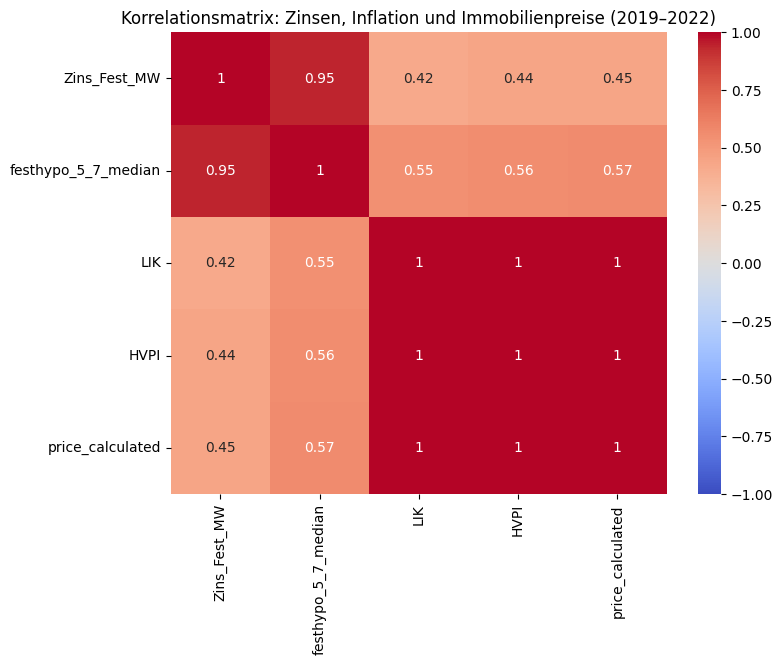

In [30]:
# 📊 Grafische Darstellung der Korrelationsmatrix (Heatmap)
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(korrelationen, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Zinsen, Inflation und Immobilienpreise (2019–2022)")
plt.show()


Interpretation der Korrelationsmatrix:
Die Analyse zeigt sehr starke positive Zusammenhänge zwischen den Inflationsindikatoren (LIK und HVPI) sowie zwischen Inflation und Immobilienpreisen (Korrelation nahe 1.0).
Auch die Zinsvariablen (feste Hypothekenzinsen und Median der Festhypotheken) weisen eine mittlere positive Korrelation zu den Immobilienpreisen auf.
Dies deutet darauf hin, dass steigende Inflation und – in etwas schwächerem Ausmass – steigende Zinsen tendenziell mit höheren Immobilienpreisen einhergehen. Aufgrund der geringen Zahl an Beobachtungen ist jedoch Vorsicht bei der Interpretation geboten.

## 4.5 Streudiagramme (Scatterplots)
Visualisierung der linearen Zusammenhänge inklusive Regressionslinie.

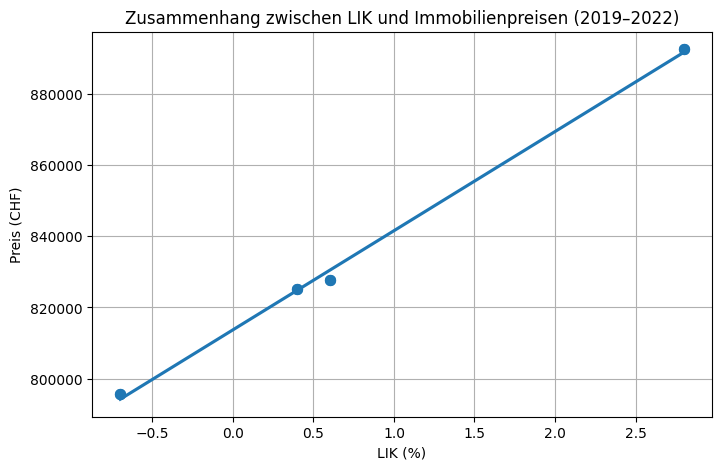

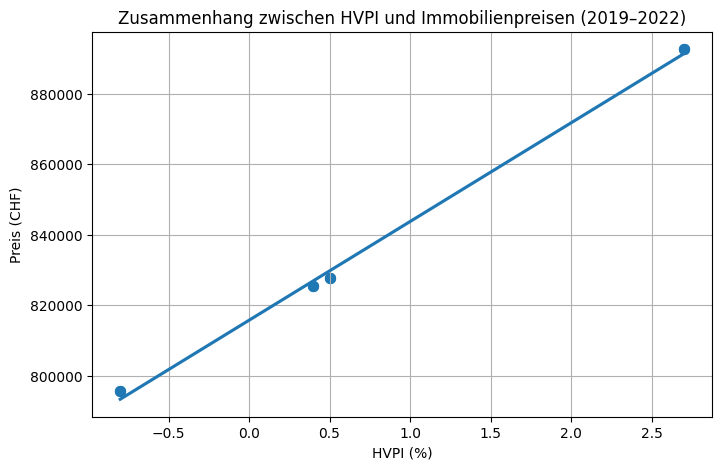

In [31]:
# 📈 Erstellung erster Scatterplots (Streudiagramme) mit Regressionslinie
# Ziel: Visualisierung des Zusammenhangs zwischen Inflation (LIK, HVPI) und Immobilienpreisen ("price_calculated")

# Importieren der Bibliothek für schönere Scatterplots mit Regressionslinie
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: LIK vs. Immobilienpreise
plt.figure(figsize=(8, 5))
sns.regplot(x=df_merged["LIK"], y=df_merged["price_calculated"], ci=None, scatter_kws={"s": 50})
plt.title("Zusammenhang zwischen LIK und Immobilienpreisen (2019–2022)")
plt.xlabel("LIK (%)")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()

# Scatterplot: HVPI vs. Immobilienpreise
plt.figure(figsize=(8, 5))
sns.regplot(x=df_merged["HVPI"], y=df_merged["price_calculated"], ci=None, scatter_kws={"s": 50})
plt.title("Zusammenhang zwischen HVPI und Immobilienpreisen (2019–2022)")
plt.xlabel("HVPI (%)")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()


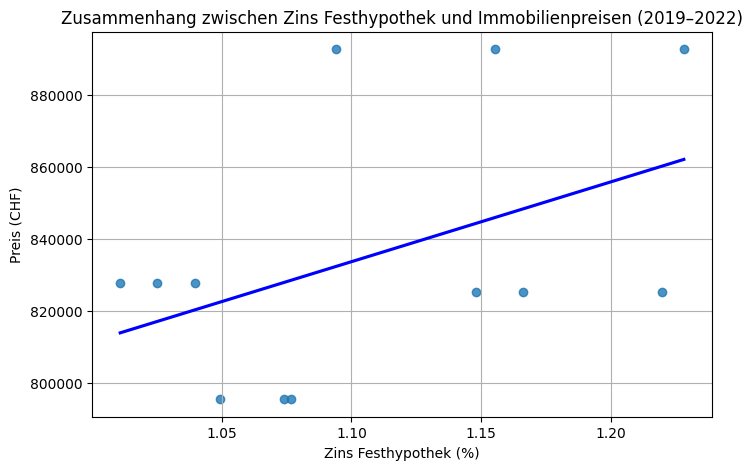

In [32]:
# 📈 Streudiagramm: Zins Festhypothek vs. Immobilienpreise
# Wir visualisieren den linearen Zusammenhang zwischen Festhypothekenzins und Immobilienpreisen

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.regplot(
    x=df_merged["Zins_Fest_MW"],
    y=df_merged["price_calculated"],
    ci=None,          # Keine Konfidenzintervallfläche
    line_kws={"color": "blue"}  # Regressionslinie blau färben
)
plt.title("Zusammenhang zwischen Zins Festhypothek und Immobilienpreisen (2019–2022)")
plt.xlabel("Zins Festhypothek (%)")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()


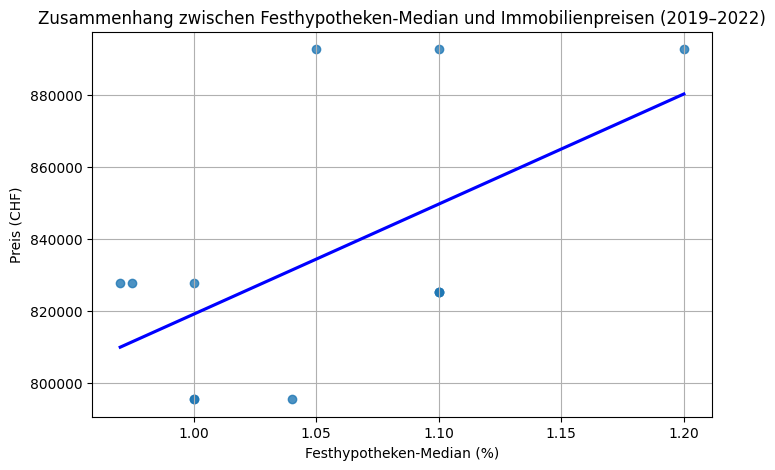

In [33]:
# 📈 Streudiagramm: Festhypotheken-Median vs. Immobilienpreise
# Wir visualisieren den Zusammenhang zwischen Median der Festhypotheken und Immobilienpreisen

plt.figure(figsize=(8, 5))
sns.regplot(
    x=df_merged["festhypo_5_7_median"],
    y=df_merged["price_calculated"],
    ci=None,
    line_kws={"color": "blue"}
)
plt.title("Zusammenhang zwischen Festhypotheken-Median und Immobilienpreisen (2019–2022)")
plt.xlabel("Festhypotheken-Median (%)")
plt.ylabel("Preis (CHF)")
plt.grid(True)
plt.show()


Interpretation der Scatterplots (Kapitel 4.5):
Die Streudiagramme zeigen, dass zwischen den Inflationsindikatoren (LIK und HVPI) und den Immobilienpreisen ein klar positiver Zusammenhang besteht: Steigende Inflationsraten sind mit höheren Immobilienpreisen verbunden.
Auch zwischen den Hypothekarzinsen (Zins Festhypothek und Median) und den Immobilienpreisen besteht ein positiver, aber schwächerer Zusammenhang.
Insgesamt deutet die Analyse darauf hin, dass Inflation einen stärkeren Einfluss auf die Immobilienpreise hatte als die Zinsentwicklung im Zeitraum 2019–2022.